In [148]:
import matplotlib as mpl
import polars as pl
import altair as alt

mpl.rcParams['figure.figsize'] = 15, 5
mpl.rcParams['figure.dpi'] = 300

In [149]:
fips = (pl
        .read_csv('fips.tab', sep = '\t', dtypes = {'fips':str})
        .with_column(
            pl.col('fips').str.split('.0').arr.get(0)
        ))
fips.head(3)

sname,sab,sid,sfips,cname,saint,cfips,fips
str,str,f64,i64,str,i64,i64,str
"""Alabama""","""AL""",1.0,1,"""AUTAUGA COUNTY...",0,1,"""1001"""
"""Alabama""","""AL""",1.0,1,"""AUTAUGA CTY.""",0,1,"""1001"""
"""Alabama""","""AL""",1.0,1,"""autauga cty.""",0,1,"""1001"""


In [150]:
jails = pl.read_csv('jails.csv')
jails.head(3)

id,county,facility_name,facility_address,facility_city,facility_state,facility_zip,is_private,in_urban_area,holds_greater_than_72_hours,holds_less_than_1_yr,felonies_greater_than_1_yr,hold_less_than_72_hours,facility_gender,num_inmates_rated_for
str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64
"""7690""","""Allen Parish""","""Oakdale City J...","""118 N 10th Str...","""Oakdale""","""LA""","""71463""",0,0,1,1,0,0,3,13
"""7691""","""Bossier Parish...","""Bossier City J...","""620 Benton Roa...","""Bossier City""","""LA""","""71111""",0,1,1,1,0,0,3,70
"""7692""","""Bossier Parish...","""Shreveport Cit...","""755 Hope Stree...","""Shreveport""","""LA""","""71101""",0,1,1,1,0,0,3,284


In [151]:
dtypes = {
    'total': int,
    'total_off_site': int,
    'male': int,
    'female': int,
    'other_gender': int,
    'white': int,
    'black': int,
    'hispanic': int,
    'asian': int,
    'american_indian': int,
    'mexican_american': int,
    'multi_racial': int,
    'other_race': int,
    'on_probation': int,
    'on_parole': int,
    'felony': int,
    'misdemeanor': int,
    'other_offense': int,
    'convicted_or_sentenced': int,
    'detained_or_awaiting_trial': int,
    'first_time_incarcerated': int,
    'employed': int,
    'unemployed': int,
    'citizen': int,
    'noncitizen': int,
    'juvenile': int,
    'juvenile_male': int,
    'juvenile_female': int,
    'death_row_condemned': int,
    'solitary_confinement': int,
    'technical_parole_violators': int,
    'civil_offense': int,
    'federal_offense': int
}

df = pl.read_csv('snapshots.csv', dtypes = dtypes)
df.head(3)

id,snapshot_date,total,total_off_site,male,female,other_gender,white,black,hispanic,asian,american_indian,mexican_american,multi_racial,other_race,on_probation,on_parole,felony,misdemeanor,other_offense,convicted_or_sentenced,detained_or_awaiting_trial,first_time_incarcerated,employed,unemployed,citizen,noncitizen,juvenile,juvenile_male,juvenile_female,death_row_condemned,solitary_confinement,technical_parole_violators,source_url,source_url_2,civil_offense,federal_offense
str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,i64
"""042b1a2a""","""2000-08-01 00:...",78,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,78,0,null,null,null,null,null,null,null,null,null,null,null,"""https://data.c...",null,null,null
"""042b1a2a""","""2000-09-01 00:...",132,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,132,0,null,null,null,null,null,null,null,null,null,null,null,"""https://data.c...",null,null,null
"""042b1a2a""","""2000-10-01 00:...",172,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,172,0,null,null,null,null,null,null,null,null,null,null,null,"""https://data.c...",null,null,null


In [152]:
df = df.with_column(
    pl.col('snapshot_date').str.strptime(pl.Date, fmt='%Y-%m-%d').cast(pl.Datetime)
)

In [153]:
cols = [c for c in df.columns if c not in ['id', 'snapshot_date', 'source_url', 'source_url_2']             ]                              

In [154]:
non_nulls = df.apply(lambda t: sum([1 for a in t if a is not None]))

In [155]:
richness = df.with_column(
    pl.Series('non_null_count', list(non_nulls)[0])
).groupby('id').agg(pl.col('non_null_count').median())

In [156]:
df = (df
 .join(jails, on = 'id').with_column(
    pl.col('county').str.to_uppercase()
)
 .join(fips, left_on = ['county', 'facility_state'], right_on = ['cname', 'sab'])
)
df.head()

id,snapshot_date,total,total_off_site,male,female,other_gender,white,black,hispanic,asian,american_indian,mexican_american,multi_racial,other_race,on_probation,on_parole,felony,misdemeanor,other_offense,convicted_or_sentenced,detained_or_awaiting_trial,first_time_incarcerated,employed,unemployed,citizen,noncitizen,juvenile,juvenile_male,juvenile_female,death_row_condemned,solitary_confinement,technical_parole_violators,source_url,source_url_2,civil_offense,federal_offense,county,facility_name,facility_address,facility_city,facility_state,facility_zip,is_private,in_urban_area,holds_greater_than_72_hours,holds_less_than_1_yr,felonies_greater_than_1_yr,hold_less_than_72_hours,facility_gender,num_inmates_rated_for,sname,sid,sfips,saint,cfips,fips
str,datetime[μs],i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,i64,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,str,f64,i64,i64,i64,str
"""042b1a2a""",2000-08-01 00:00:00,78,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,78,0,null,null,null,null,null,null,null,null,null,null,null,"""https://data.c...",null,null,null,"""SUSSEX COUNTY""","""Greensville Co...","""901 Correction...","""Jarratt""","""VA""","""23870""",0,-1,1,1,1,1,3,3007,"""Virginia""",46.0,51,0,183,"""51183"""
"""042b1a2a""",2000-09-01 00:00:00,132,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,132,0,null,null,null,null,null,null,null,null,null,null,null,"""https://data.c...",null,null,null,"""SUSSEX COUNTY""","""Greensville Co...","""901 Correction...","""Jarratt""","""VA""","""23870""",0,-1,1,1,1,1,3,3007,"""Virginia""",46.0,51,0,183,"""51183"""
"""042b1a2a""",2000-10-01 00:00:00,172,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,172,0,null,null,null,null,null,null,null,null,null,null,null,"""https://data.c...",null,null,null,"""SUSSEX COUNTY""","""Greensville Co...","""901 Correction...","""Jarratt""","""VA""","""23870""",0,-1,1,1,1,1,3,3007,"""Virginia""",46.0,51,0,183,"""51183"""
"""042b1a2a""",2000-11-01 00:00:00,172,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,172,0,null,null,null,null,null,null,null,null,null,null,null,"""https://data.c...",null,null,null,"""SUSSEX COUNTY""","""Greensville Co...","""901 Correction...","""Jarratt""","""VA""","""23870""",0,-1,1,1,1,1,3,3007,"""Virginia""",46.0,51,0,183,"""51183"""
"""042b1a2a""",2000-12-01 00:00:00,172,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,172,0,null,null,null,null,null,null,null,null,null,null,null,"""https://data.c...",null,null,null,"""SUSSEX COUNTY""","""Greensville Co...","""901 Correction...","""Jarratt""","""VA""","""23870""",0,-1,1,1,1,1,3,3007,"""Virginia""",46.0,51,0,183,"""51183"""


In [157]:
df = df.with_column(
    pl.col('total').median().over('id').alias('pop_median')
)

In [158]:
richness = (richness
 .join(jails, on = 'id').with_column(
    pl.col('county').str.to_uppercase()
)
 .join(fips, left_on = ['county', 'facility_state'], right_on = ['cname', 'sab'])
)
richness.head()

id,non_null_count,county,facility_name,facility_address,facility_city,facility_state,facility_zip,is_private,in_urban_area,holds_greater_than_72_hours,holds_less_than_1_yr,felonies_greater_than_1_yr,hold_less_than_72_hours,facility_gender,num_inmates_rated_for,sname,sid,sfips,saint,cfips,fips
str,f64,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,str,f64,i64,i64,i64,str
"""8d6f8933""",6.0,"""COCHISE COUNTY...","""ASPC-Douglas""","""6911 N. BDI Bl...","""Douglas""","""AZ""","""85607""",0,0,1,-1,1,-1,1,1805,"""Arizona""",3.0,4,0,3,"""4003"""
"""4987b1ae""",6.0,"""GRAHAM COUNTY""","""ASPC-Safford""","""896 S. Cook Ro...","""Safford""","""AZ""","""85546""",0,0,1,-1,1,-1,1,1453,"""Arizona""",3.0,4,0,9,"""4009"""
"""043dc9e7""",6.0,"""MARICOPA COUNT...","""ASPC-Perryvill...","""2105 North Cit...","""Goodyear""","""AZ""","""85395""",0,0,1,-1,1,-1,2,4214,"""Arizona""",3.0,4,0,13,"""4013"""
"""15083a80""",6.0,"""MARICOPA COUNT...","""ASPC-Phoenix""","""2500 E Van Bur...","""Phoenix""","""AZ""","""85008""",0,1,1,-1,1,-1,3,552,"""Arizona""",3.0,4,0,13,"""4013"""
"""921f212c""",6.0,"""MARICOPA COUNT...","""ASPC-Lewis""","""26700 South Hi...","""Buckeye""","""AZ""","""85326""",0,0,1,-1,1,-1,1,5104,"""Arizona""",3.0,4,0,13,"""4013"""


In [203]:
def county_map(
    source,
    title_string,
    subtitle_string,
    color_by,
    legend_title,
):
    from vega_datasets import data
    counties = alt.topo_feature(data.us_10m.url, 'counties')
    
    base = alt.Chart(counties).mark_geoshape(
        fill = 'fff',
        stroke = 'black',
        strokeWidth = .1
    )
    
    data_layer = alt.Chart(counties,
          title = alt.TitleParams(
              fontSize = 20,
              subtitleFontSize = 15,
              anchor = 'start',
              text = title_string,
              subtitle = subtitle_string,),
    ).mark_geoshape(
        stroke = 'black',
        strokeWidth = .4,
    ).encode(
        color = alt.Color(
            f'{color_by}:Q', 
            scale = alt.Scale(scheme='orangered'), 
            title = legend_title),
    ).transform_lookup(
        lookup = 'id',
        from_ = alt.LookupData(
            source, 
            'fips', 
            [color_by])
    ).project(
        type = 'albersUsa'
    ).properties(
        width = 1000,
        height = 600
    )

    return (base + data_layer)

In [221]:
def county_map_state_filter(
    source,
    title_string,
    subtitle_string,
    color_by,
    legend_title,
    state_code,
    width = 1000,
    height = 600,
):
    
#     https://www2.census.gov/programs-surveys/decennial/2010/partners/pdf/FIPS_StateCounty_Code.pdf

    from vega_datasets import data
    counties = alt.topo_feature(data.us_10m.url, 'counties')
    
    base = alt.Chart(counties).mark_geoshape(
        fill = 'fff',
        stroke = 'black',
        strokeWidth = .1
    ).transform_calculate(
        state_id = "(datum.id / 1000)|0"
    ).transform_filter((alt.datum.state_id)==state_code)
    
    data_layer = alt.Chart(counties,
          title = alt.TitleParams(
              fontSize = 20,
              subtitleFontSize = 15,
              anchor = 'start',
              text = title_string,
              subtitle = subtitle_string,),
    ).mark_geoshape(
        stroke = 'black',
        strokeWidth = .4,
    ).encode(
        color = alt.Color(
            f'{color_by}:Q', 
            scale = alt.Scale(scheme='orangered'), 
            title = legend_title),
    ).transform_lookup(
        lookup = 'id',
        from_ = alt.LookupData(
            source, 
            'fips', 
            [color_by])
    ).project(
        type = 'albersUsa'
    ).properties(
        width = width,
        height = height,
    ).transform_calculate(
        state_id = "(datum.id / 1000)|0"
    ).transform_filter((alt.datum.state_id)==state_code)

    return (base + data_layer)

In [222]:


incidents = pl.read_csv('incidents.csv', dtype = {'id': str})

deaths = inc.groupby(['id']).agg(pl.col('deaths').sum()).join(jails, on = 'id').with_column(
    pl.col('county').str.to_uppercase()
).join(df, left_on = ['county', 'facility_state'], right_on = ['county', 'facility_state'])

deaths = deaths.groupby('id').agg([
    (pl.col('deaths').first()/pl.col('pop_median').first()).alias('deaths_per_cap'),
    (pl.col('deaths').first()/pl.col('num_inmates_rated_for').first()).alias('deaths_per_jailsize'),
    pl.col('deaths').first().alias('deaths'),
    pl.col('fips').first(),
    pl.col('facility_name').first(),
    pl.col('pop_median').first(),
    pl.col('num_inmates_rated_for').first(),
])

In [223]:
deaths.sort('deaths_per_cap').tail()

id,deaths_per_cap,deaths_per_jailsize,deaths,fips,facility_name,pop_median,num_inmates_rated_for
str,f64,f64,i64,str,str,f64,i64
"""6846""",1.576271,0.801724,93,"""12086""","""Miami-Dade Cou...",59.0,116
"""7994""",2.0,0.007576,4,"""28089""","""Madison County...",2.0,528
"""8125""",13.0,0.021104,26,"""29189""","""St. Louis Coun...",2.0,1232
"""9201""",inf,0.017003,16,"""48309""","""McLennan Count...",0.0,941
"""9635""",inf,0.0185,24,"""25009""","""Essex County S...",0.0,1291


In [224]:
deaths.sort('deaths_per_jailsize').tail()

id,deaths_per_cap,deaths_per_jailsize,deaths,fips,facility_name,pop_median,num_inmates_rated_for
str,f64,f64,i64,str,str,f64,i64
"""6957""",0.126344,0.104911,47,"""13069""","""Coffee County ...",372.0,448
"""6697""",0.064965,0.137592,56,"""6059""","""Orange County ...",862.0,407
"""6719""",0.5,0.142503,115,"""6073""","""San Diego Coun...",230.0,807
"""6657""",0.035385,0.1796875,23,"""6013""","""Marsh Creek De...",650.0,128
"""6846""",1.576271,0.801724,93,"""12086""","""Miami-Dade Cou...",59.0,116


In [232]:
county_map_state_filter(deaths.filter(pl.col('deaths_per_cap') < 1).to_pandas(), 
           title_string = 'The deadliest prison counties in California',
           subtitle_string = [
               "The deadlist counties to be incarcerated in, per capita",
               "Darker regions indicate more deaths per capita. (White means no data.)",
               "(From dolthub.com and Reuters News)"],
           color_by = 'deaths_per_cap',
           legend_title = ['Deaths while', 'incarcerated', '(per inmate)'],
           state_code = 6,
           width = 500,
           height = 600
          )

alt.LayerChart(...)

In [236]:
county_map_state_filter(deaths.filter(pl.col('deaths_per_cap') < 1).to_pandas(), 
           title_string = 'The deadliest prison counties in Florida',
           subtitle_string = [
               "The deadlist counties to be incarcerated in, per capita",
               "Darker regions indicate more deaths per capita. (White means no data.)",
               "(From dolthub.com and Reuters News)"],
           color_by = 'deaths_per_cap',
           legend_title = ['Deaths while', 'incarcerated', '(per inmate)'],
           state_code = 12,
           width = 500,
           height = 600
          )

alt.LayerChart(...)

In [239]:
county_map(deaths.filter(pl.col('deaths_per_cap') < 1).to_pandas(), 
           title_string = 'The deadliest prison counties', 
           subtitle_string = [
               "The deadlist counties to be incarcerated in, per capita"
               "Darker regions indicate more deaths per capita. (White means no data.)",
               "(From dolthub.com and Reuters News)"],
           color_by = 'deaths_per_jailsize',
           legend_title = ['Deaths during', 'incarceration',  '(normalized to jail size)'],
          )

alt.LayerChart(...)

In [241]:
county_map(deaths.to_pandas(), 
           title_string = 'Reported jail and prison deaths by county', 
           subtitle_string = [
               "The deadlist counties to be incarcerated in. "
               "Darker regions indicate more deaths.",
               "From 2009-2019 there were 317 deaths in Los Angeles County, 150 in Phildelphia County, and 115 in San Diego County. (White means no data)",
               "(From dolthub.com and Reuters News)"],
           
           color_by = 'deaths',
           legend_title = ['Deaths', '(during incarceration)'],
          )

alt.LayerChart(...)

In [242]:
county_map(df.groupby(['id', 'fips']).count().to_pandas(), 
           title_string = 'Jail snapshot records captured per county, US',
           subtitle_string = [
                "We surveyed jails for public-facing statistical data (aggregate inmate counts, demographics, etc).",
                "Darker regions indicate jails with more records.",
                "(From dolthub.com)"
           ],
           color_by = 'count',
           legend_title = 'Number of records',
          )

alt.LayerChart(...)

In [243]:
county_map(richness.to_pandas(), 
           title_string = 'Jail data richness per county, US',
           subtitle_string = [
                "We surveyed jails for public-facing statistical data: inmate counts, demographics, etc.",
                "Darker regions indicate counties with higher 'data richness', or more non-null fields (demographic data, etc).",
                "(From dolthub.com)"
           ],
           color_by = 'non_null_count',
           legend_title = ['Data completeness', '(i.e non-null columns)'],
          )

alt.LayerChart(...)

<AxesSubplot:>

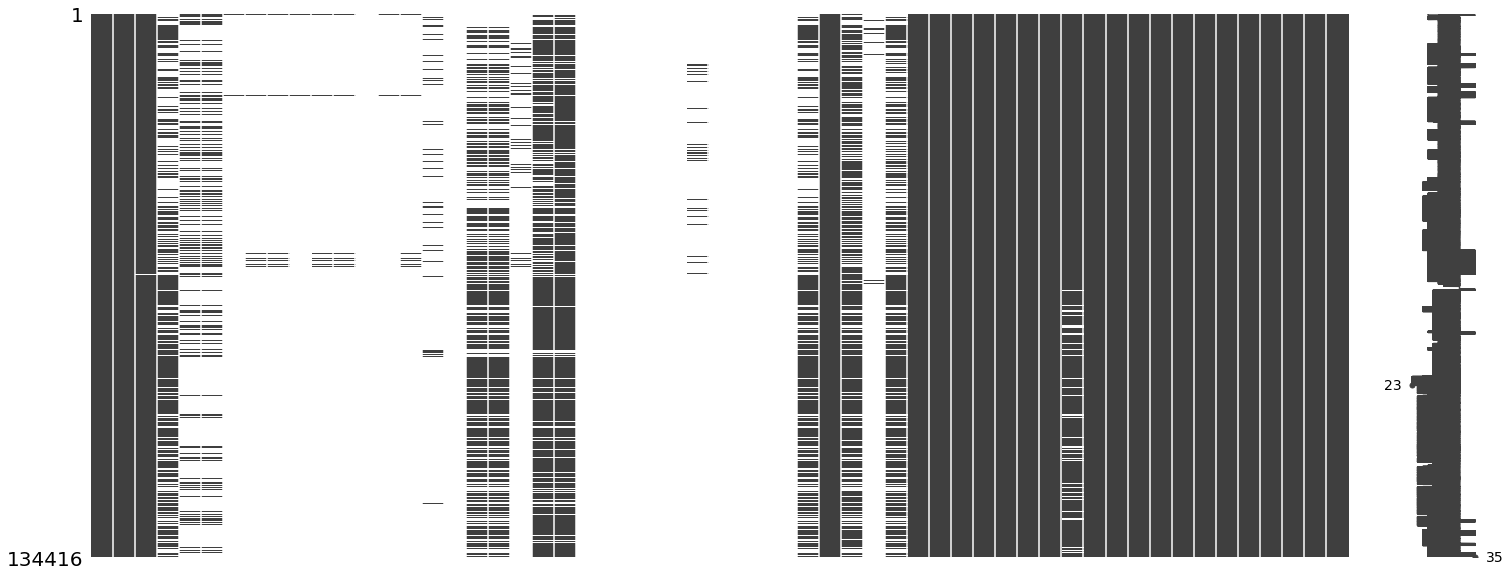

In [280]:
import pandas as pd
import missingno as msno
%matplotlib inline
msno.matrix(df.to_pandas())

In [281]:
import os
df = df.with_column(
    pl.col('source_url').apply(lambda x: os.path.splitext(x)[1]).alias('ext')
)

In [282]:
df['ext'].value_counts()

ext,counts
str,u32
""".pdf""",90788
""".asp""",29633
"""""",9080
""".html""",3105
""".aspx""",1082
""".cfm""",728


In [286]:
deaths.sort('deaths').tail(3)

id,deaths,county,facility_name,facility_address,facility_city,facility_state,facility_zip,is_private,in_urban_area,holds_greater_than_72_hours,holds_less_than_1_yr,felonies_greater_than_1_yr,hold_less_than_72_hours,facility_gender,num_inmates_rated_for,sname,sid,sfips,saint,cfips,fips
str,i64,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,str,f64,i64,i64,i64,str
"""6719""",115,"""SAN DIEGO COUN...","""San Diego Coun...","""325 South Melr...","""Vista""","""CA""","""92081""",0,1,1,1,1,0,3,807,"""California""",5.0,6,0,73,"""6073"""
"""8858""",150,"""PHILADELPHIA C...","""Philadelphia D...","""7901 State Roa...","""Philadelphia""","""PA""","""19136""",0,1,1,1,1,0,3,5019,"""Pennsylvania""",38.0,42,0,101,"""42101"""
"""6678""",317,"""LOS ANGELES CO...","""Los Angeles Co...","""441 Bauchet St...","""Los Angeles""","""CA""","""90012""",0,1,-9,-9,-9,-9,-9,5188,"""California""",5.0,6,0,37,"""6037"""


In [244]:
jail_ids = df.groupby('id').count().sort('count').tail(500).sample(3)['id'].to_list()

source = df.filter(
    pl.col('id').is_in(jail_ids)
).join(jails, on = 'id').with_columns([
    pl.col('county').str.to_uppercase(),
    pl.concat_str(['facility_name', pl.lit(', '), 'facility_state']).alias('Facility'),
    pl.col('total').median().over('id').alias('median')
    # pl.col('total').alias('Total inmates')
]).filter(pl.col('total') < 5*pl.col('median')).filter(pl.col('total') > .2*pl.col('median')).to_pandas()

lines = (
    alt.Chart(source)
    .mark_line()
    .encode(
        x="snapshot_date", 
        y=alt.Y("total", title = 'Inmate population total'), 
        color="Facility")
).properties(
    width=700,
    height=300
).configure_legend(
    labelLimit = 1000,
    titleFontSize=14,
    labelFontSize=14,
).configure_axis(
    labelFontSize = 14,
    titleFontSize = 14,
)

lines

alt.Chart(...)

id
123ce952    AxesSubplot(0.125,0.125;0.775x0.755)
8c931c76    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

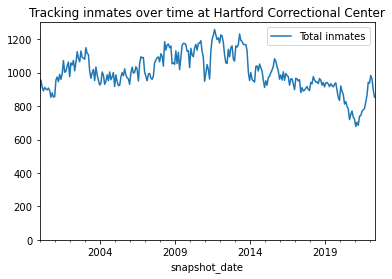

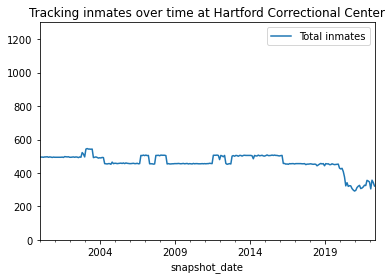

In [246]:
df.filter((pl.col('id') == '123ce952') | (pl.col('id') == '8c931c76')).join(jails, on = 'id').with_columns([
    pl.col('county').str.to_uppercase(),
    pl.col('total').alias('Total inmates')
]).to_pandas().groupby('id').plot(x = 'snapshot_date', y = 'Total inmates', title = 'Tracking inmates over time at Hartford Correctional Center', ylim = [0, 1300])